**REGRESSION**

In [1]:
# IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.formula.api import ols
from utils.utils import draw_stars_line

In [2]:
# load the data
# data = sns.load_dataset("penguins")
data = pd.read_csv('fish.csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    128 non-null    object 
 1   mass_g     128 non-null    float64
 2   length_cm  128 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB
None


**CREATE MODEL WITH CATEGORICAL EXPLANATORY VARIABLE**

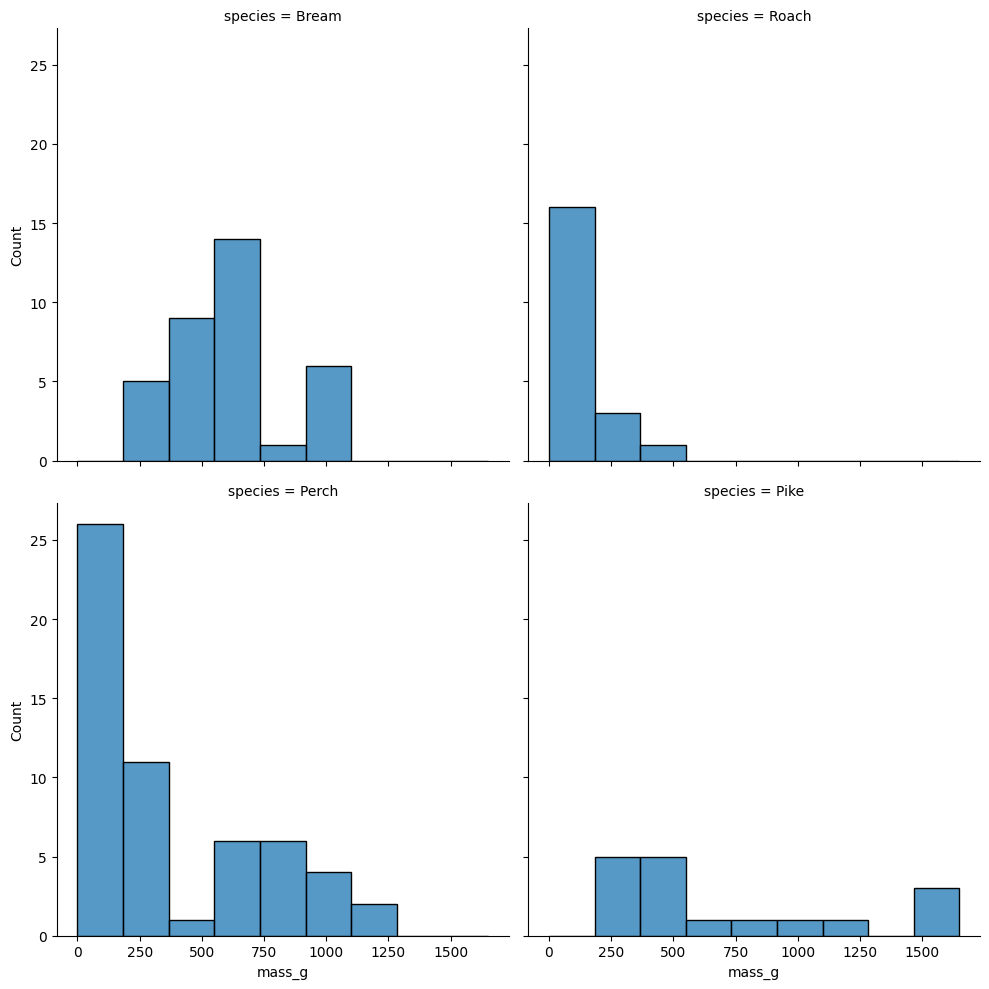

In [3]:
# VISUALIZE 1 NUMERICAL AND 1 CATEGORICAL VARIABLE

# Create a histogram of the 'mass_g' column using seaborn displot
sns.displot(data=data, x='mass_g', col='species', col_wrap=2, bins=9)


In [4]:
# Summary statistics: mean
# Calculate the mean of the 'mass_g' column for each species
mean_mass = data.groupby('species')['mass_g'].mean().reset_index()
print(mean_mass)

  species      mass_g
0   Bream  617.828571
1   Perch  382.239286
2    Pike  718.705882
3   Roach  152.050000


In [5]:
# RUN LINEAR REGRESSION 
# Fit a linear regression model to predict 'mass_g' based on 'length_cm'
model = ols('mass_g ~ length_cm ', data=data).fit()
# Print the summary of the regression model
print(model.params)

Intercept   -536.223947
length_cm     34.899245
dtype: float64


**MAKE PREDICTION**

0    161.760959
1    196.660204
2    231.559449
3    266.458695
4    301.357940
dtype: float64


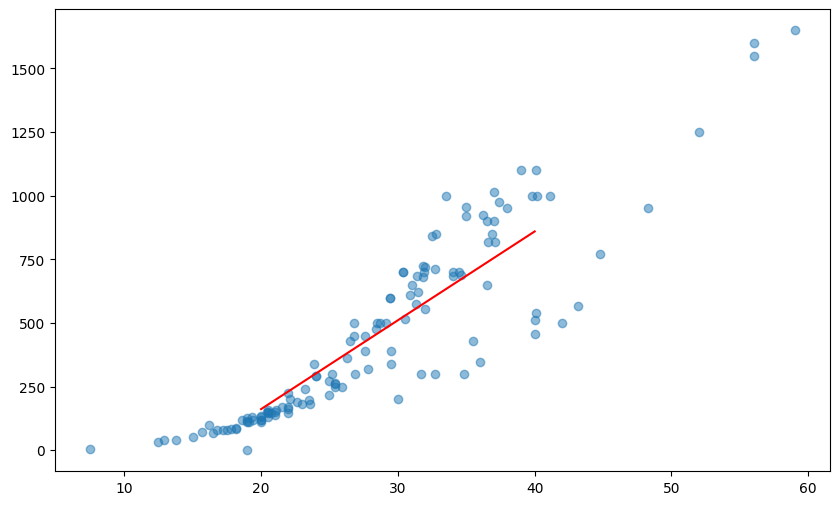

In [6]:
explanotory_data = pd.DataFrame({
    "length_cm": np.arange(20, 41),
})

# PREDICT THE RESPONSE VARIABLE
predictions = model.predict(explanotory_data)
print(predictions.head())

# PLOT THE PREDICTIONS
plt.figure(figsize=(10, 6))
plt.scatter(data['length_cm'], data['mass_g'], alpha=0.5, label='Data')
plt.plot(explanotory_data['length_cm'], predictions, color='red', label='Regression Line')

**MODEL OBJECTS**

In [7]:
# params attribute
# Get the parameters of the fitted model
params = model.params
print(params)

Intercept   -536.223947
length_cm     34.899245
dtype: float64


<Axes: >

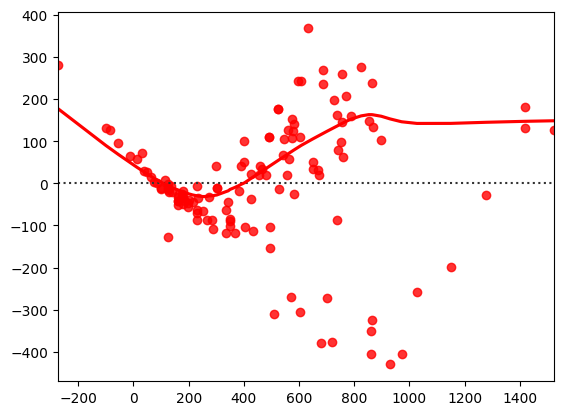

In [8]:
# get the fitted values
fitted_values = model.fittedvalues
# print(fitted_values)

explanotory_data = data[data['species']=='Bream']

predicted_mass = model.predict(explanotory_data)
# print(predicted_mass)

sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, color='red')

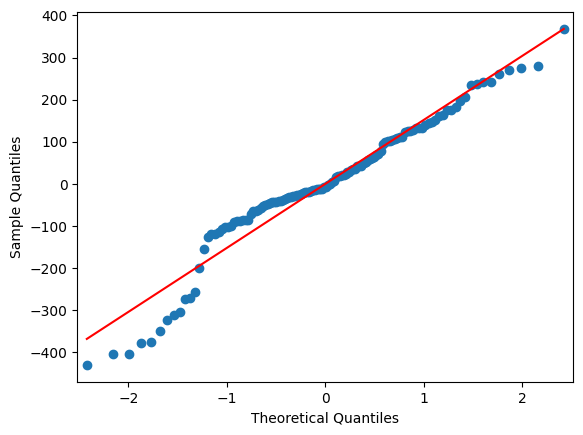

In [9]:
from statsmodels.api import qqplot
qqplot(model.resid, line='r')
plt.show()